In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist


In [2]:
# Load the dataset
file_path = '/content/wine.csv'
df = pd.read_csv(file_path)

# Check data
df.head()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Basic information
print("Info:\n")
print(df.info())

# Basic statistics
print("\nStatistics:\n")
print(df.describe())

# Missing values
print("\nMissing values:\n")
print(df.isnull().sum())


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

Statistics:

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \


Feature Distributions
    

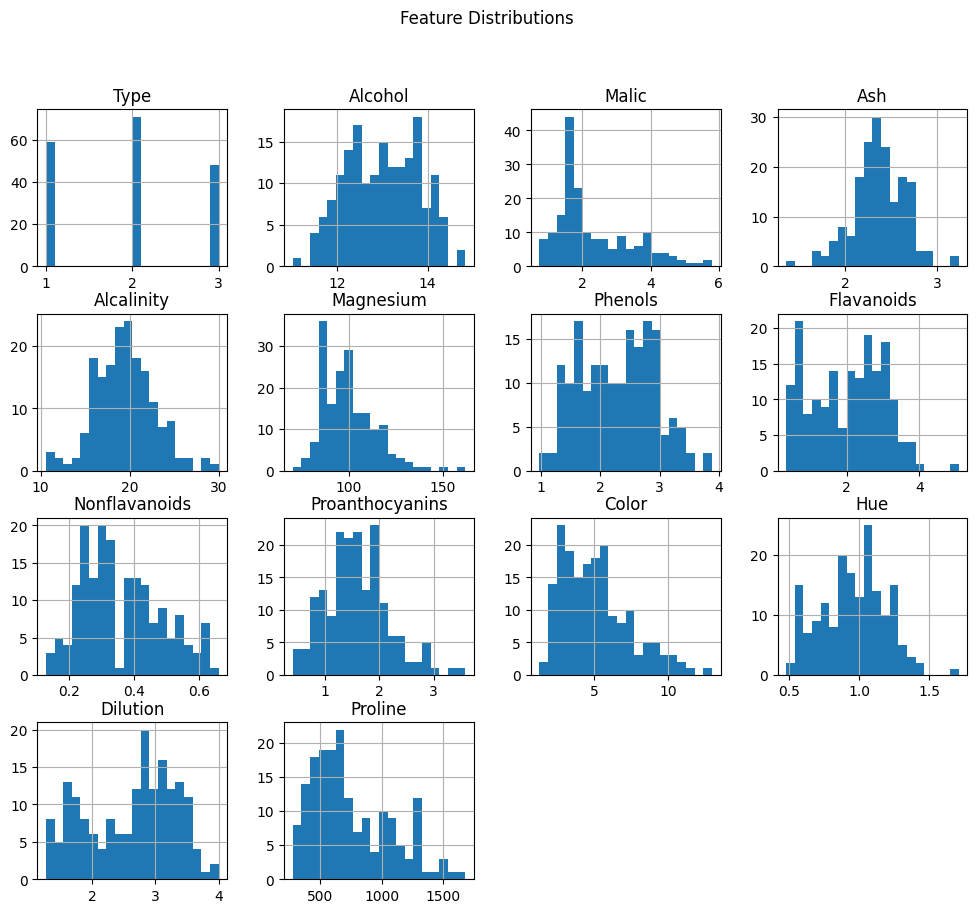

In [4]:
# Feature distribution
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()


Correlation Heatmap


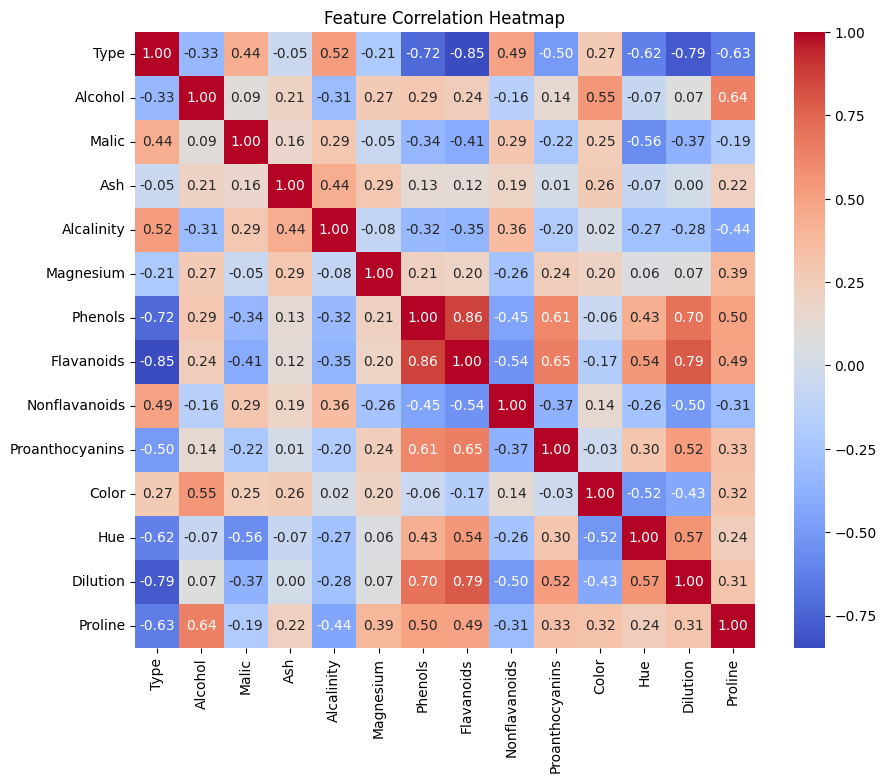

In [5]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


Standardization

In [6]:
# Standardizing features (excluding 'Type' if it's a class label)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:])


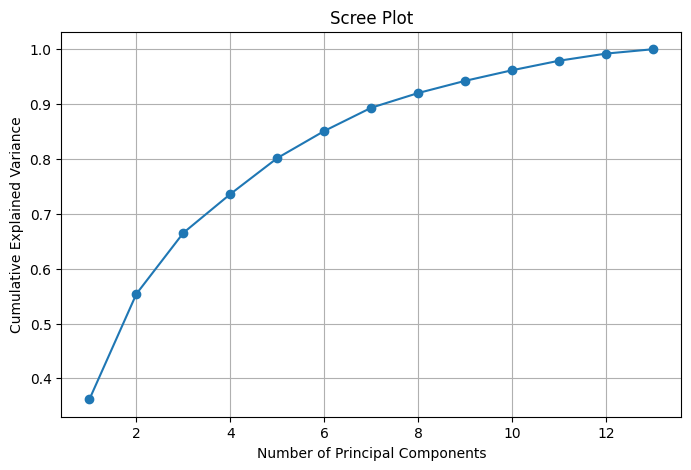

Optimal number of components: 10


In [7]:
# Applying PCA
pca = PCA()
pca_transformed = pca.fit_transform(df_scaled)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(df.columns)), np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid()
plt.show()

# Optimal number of components
optimal_pca_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Optimal number of components: {optimal_pca_components}")


In [8]:
# Apply PCA with optimal components
pca = PCA(n_components=optimal_pca_components)
pca_data = pca.fit_transform(df_scaled)


In [9]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster_Original"] = kmeans.fit_predict(df_scaled)

# Clustering evaluation
silhouette_orig = silhouette_score(df_scaled, df["Cluster_Original"])
db_orig = davies_bouldin_score(df_scaled, df["Cluster_Original"])
print(f"Silhouette Score (Original Data): {silhouette_orig}")
print(f"Davies-Bouldin Index (Original Data): {db_orig}")


Silhouette Score (Original Data): 0.2848589191898987
Davies-Bouldin Index (Original Data): 1.3891879777181648


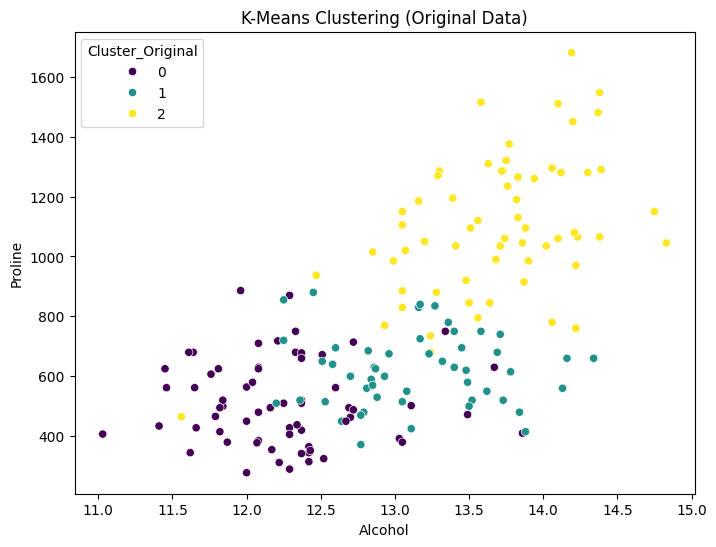

In [10]:
# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Alcohol"], y=df["Proline"], hue=df["Cluster_Original"], palette="viridis")
plt.title("K-Means Clustering (Original Data)")
plt.show()


In [11]:
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster_PCA"] = kmeans_pca.fit_predict(pca_data)

# Clustering evaluation
silhouette_pca = silhouette_score(pca_data, df["Cluster_PCA"])
db_pca = davies_bouldin_score(pca_data, df["Cluster_PCA"])
print(f"Silhouette Score (PCA Data): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA Data): {db_pca}")


Silhouette Score (PCA Data): 0.29867482943692886
Davies-Bouldin Index (PCA Data): 1.3363263335155773


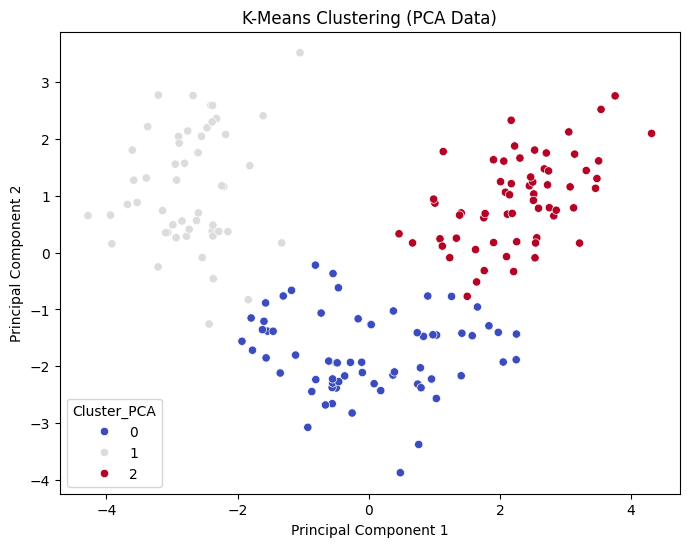

In [12]:
# Visualization of PCA clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df["Cluster_PCA"], palette="coolwarm")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (PCA Data)")
plt.show()


In [13]:
print("Comparison of Clustering Performance:")
print(f"Silhouette Score - Original: {silhouette_orig}, PCA: {silhouette_pca}")
print(f"Davies-Bouldin Index - Original: {db_orig}, PCA: {db_pca}")


Comparison of Clustering Performance:
Silhouette Score - Original: 0.2848589191898987, PCA: 0.29867482943692886
Davies-Bouldin Index - Original: 1.3891879777181648, PCA: 1.3363263335155773


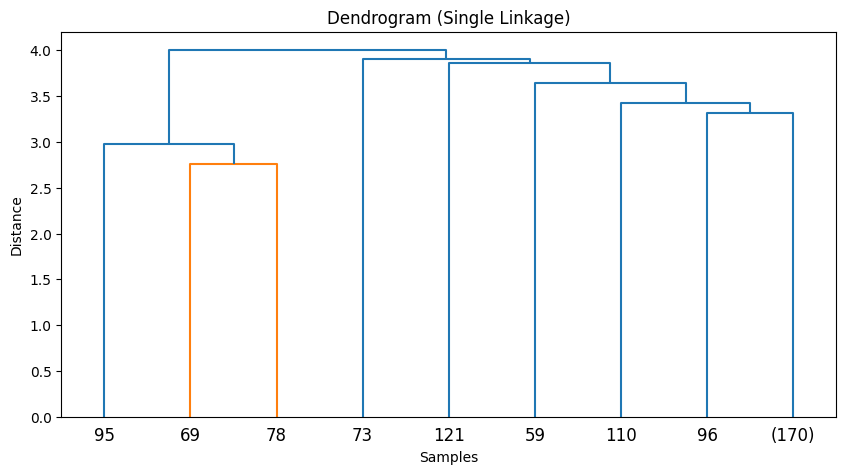

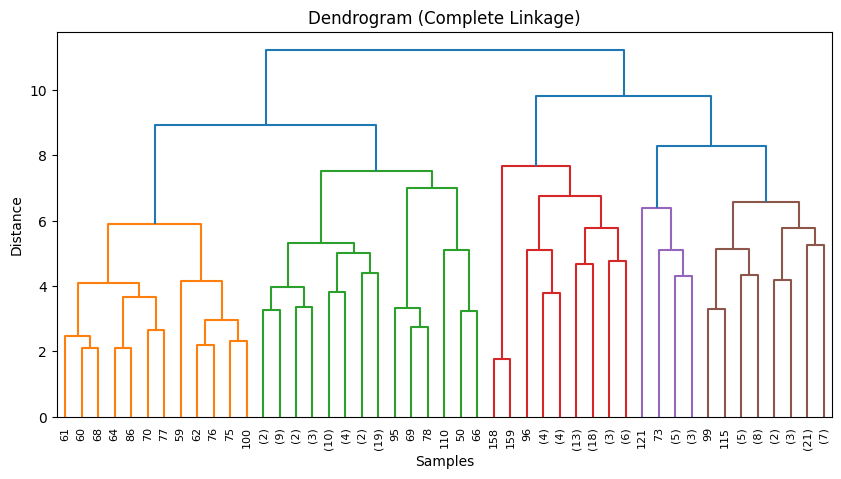

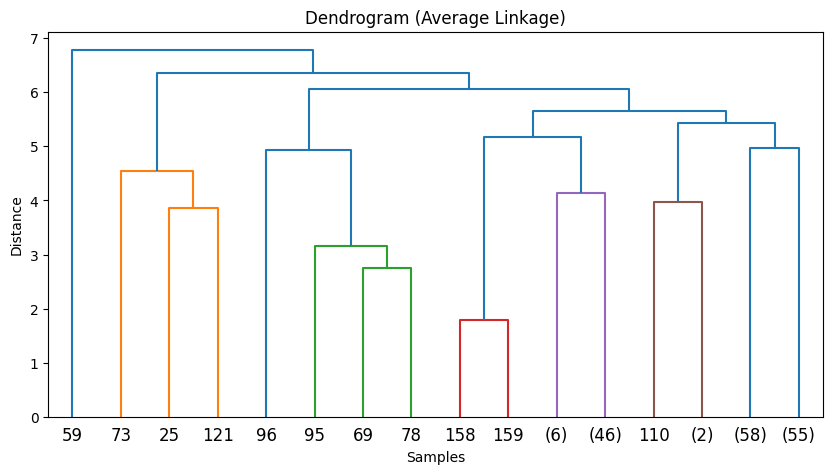

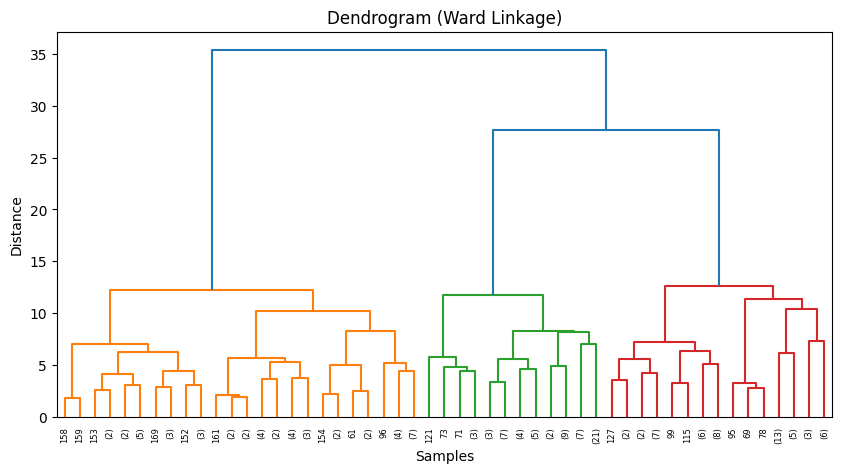

In [14]:
linkage_methods = ['single', 'complete', 'average', 'ward']

for method in linkage_methods:
    plt.figure(figsize=(10, 5))
    linked = linkage(df_scaled, method=method)
    dendrogram(linked, truncate_mode='level', p=5)
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()


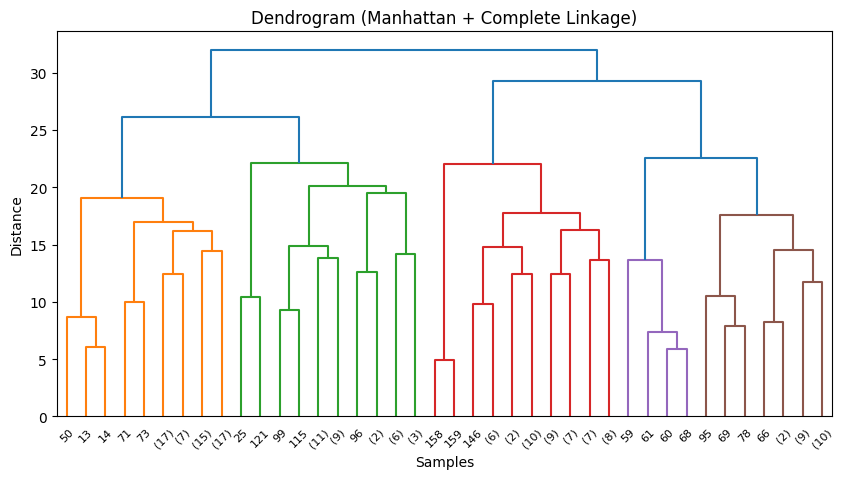

In [15]:
# Manhattan Distance + Complete Linkage
distance_matrix = pdist(df_scaled, metric='cityblock')
linkage_manhattan = linkage(distance_matrix, method='complete')

plt.figure(figsize=(10, 5))
dendrogram(linkage_manhattan, truncate_mode='level', p=5)
plt.title("Dendrogram (Manhattan + Complete Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


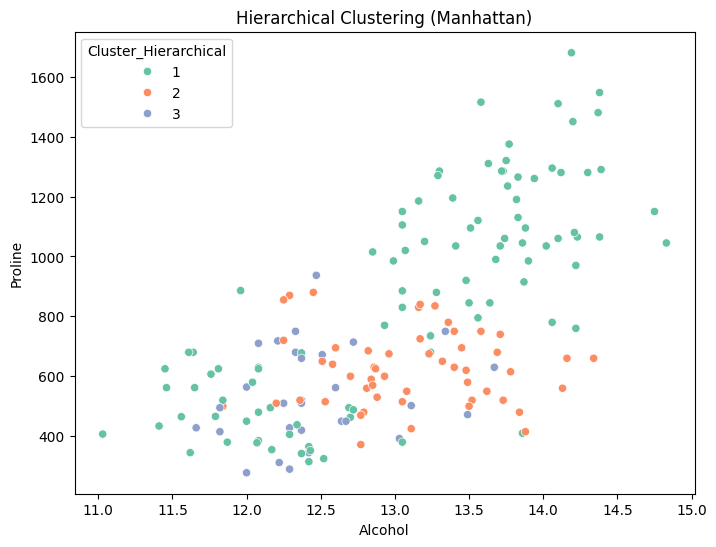

In [16]:
# Assign clusters from dendrogram (k=3)
clusters_hier = fcluster(linkage_manhattan, 3, criterion='maxclust')
df["Cluster_Hierarchical"] = clusters_hier

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Alcohol"], y=df["Proline"], hue=df["Cluster_Hierarchical"], palette="Set2")
plt.title("Hierarchical Clustering (Manhattan)")
plt.show()


In [17]:
# Target variable
y = df['Alcohol']
X = pca_data

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression on PCA data
lr_pcr = LinearRegression()
lr_pcr.fit(X_train, y_train)
y_pred = lr_pcr.predict(X_test)

# Evaluation
print("PCR Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


PCR Evaluation:
R² Score: 0.9727969778031065
RMSE: 0.1274408811445841


In [18]:
# Original features model
X_orig = df_scaled

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y, test_size=0.2, random_state=42)
lr_orig = LinearRegression()
lr_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = lr_orig.predict(X_test_orig)

print("Original Features Regression:")
print("R² Score:", r2_score(y_test_orig, y_pred_orig))
print("RMSE:", np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)))


Original Features Regression:
R² Score: 1.0
RMSE: 1.0255800994045674e-15
